In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split # data split

from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [208]:
df = pd.read_csv("/Users/.../Downloads/NY_lung_cancer_dataset_2009_to_2021.csv")

df

,Unnamed: 0,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,...,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs,Year
0,0,New York City,Manhattan,7002020.0,1453.0,Memorial Hospital for Cancer and Allied Diseases,50 to 69,NaN,M,White,...,Surgical,Blue Cross,NaN,NaN,0.0,N,N,46310.15,20853.59,2009
1,1,New York City,Manhattan,7002020.0,1453.0,Memorial Hospital for Cancer and Allied Diseases,50 to 69,NaN,M,White,...,Surgical,Blue Cross,NaN,NaN,0.0,N,N,62687.90,24499.28,2009
2,2,New York City,Manhattan,7002053.0,1463.0,NYU Hospitals Center,50 to 69,NaN,F,White,...,Surgical,Insurance Company,NaN,NaN,0.0,N,N,72472.90,22973.12,2009
3,3,New York City,Manhattan,7002020.0,1453.0,Memorial Hospital for Cancer and Allied Diseases,70 or Older,NaN,M,White,...,Surgical,Insurance Company,NaN,NaN,0.0,N,N,53048.51,23430.57,2009
4,4,New York City,Manhattan,7002053.0,1463.0,NYU Hospitals Center,70 or Older,NaN,M,White,...,Surgical,Insurance Company,Medicare,Self-Pay,0.0,N,N,45696.98,14662.53,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119555,8436,New York City,Manhattan,7002053.0,1463.0,NYU Langone Hospitals,50 to 69,100,M,White,...,Medical,Blue Cross/Blue Shield,NaN,NaN,NaN,NaN,Y,94586.39,25266.78,2021
119556,8437,New York City,Manhattan,7002053.0,1463.0,NYU Langone Hospitals,50 to 69,100,M,White,...,Surgical,Blue Cross/Blue Shield,NaN,NaN,NaN,NaN,Y,120136.99,28118.31,2021
119557,8438,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,70 or Older,104,M,White,...,Medical,Medicare,NaN,NaN,NaN,NaN,Y,167890.18,28383.51,2021
119558,8439,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,50 to 69,104,F,Black/African American,...,Medical,Medicare,Medicaid,NaN,NaN,NaN,Y,269262.76,49252.90,2021


In [210]:
cat_col = df.select_dtypes(include='object')

for i in cat_col:
    print(df[i].value_counts())
    print('-----------')

New York City      56910
Long Island        15318
Hudson Valley      10912
Western NY          9568
Capital/Adirond     7749
Central NY          7482
Finger Lakes        7154
Capital/Adiron      2455
Southern Tier       1987
Name: Hospital Service Area, dtype: int64
-----------
Manhattan      27901
Bronx          10139
Kings           8858
Nassau          8629
Erie            8330
Queens          7854
Suffolk         6689
Monroe          5897
Albany          4837
Westchester     4768
Onondaga        4741
Richmond        2158
Dutchess        1866
Orange          1777
Oneida          1738
Rockland        1412
Broome          1354
Schenectady     1126
Warren           977
Otsego           786
Clinton          642
Ulster           639
Saratoga         551
Rensselaer       538
Jefferson        519
Chemung          505
Niagara          447
Ontario          403
Chautauqua       353
Putnam           351
St Lawrence      304
Tompkins         238
Franklin         217
Columbia         208
Cattara

Self-Pay                     22029
Medicaid                      5199
Medicare                      3926
Private Health Insurance      2205
Blue Cross/Blue Shield        1279
Insurance Company              336
Federal/State/Local/VA         252
Blue Cross                     213
Unknown                        109
Miscellaneous/Other             86
Managed Care, Unspecified       45
CHAMPUS                         23
Workers Compensation             2
Other Non-Federal Program        2
Other Federal Program            1
Department of Corrections        1
Name: Payment Typology 3, dtype: int64
-----------
N    83940
Name: Abortion Edit Indicator, dtype: int64
-----------
N        56007
Y        44503
False    11065
True      7985
Name: Emergency Department Indicator, dtype: int64
-----------


In [211]:
# replace Capital/Adirond and Capital/Adiron with Capital Adirondack
df['Hospital Service Area']=df['Hospital Service Area'].replace(['Capital/Adirond','Capital/Adiron'],'Capital Adirondack')


df['Hospital Service Area'].value_counts()

New York City         56910
Long Island           15318
Hudson Valley         10912
Capital Adirondack    10204
Western NY             9568
Central NY             7482
Finger Lakes           7154
Southern Tier          1987
Name: Hospital Service Area, dtype: int64

In [212]:
def risk_dead(row):
    mortality=row[-7]
    Age_group = row[6]
    
    if mortality=='Extreme' and Age_group=='70 or Older':
       return "high risk of death"
    elif mortality =='major' and Age_group=='70 or Older':
       return "high risk death"
    else:
        
        return "low-medium risk of death"

In [213]:
df['Risk of Death']=df.apply(risk_dead,axis="columns").to_frame()

In [225]:
# as 2 of three variables are 19 in CCSR Diagnosis Code, drop CCSR Diagnosis Code
#as three category refers to the same meaning in CCSR Diagnosis Description,drop CCSR Diagnosis Description

df.drop(columns=['CCSR Diagnosis Code','CCSR Diagnosis Description'],axis=1)

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119560 entries, 0 to 119559
Data columns (total 35 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Unnamed: 0                           119560 non-null  int64  
 1   Hospital Service Area                119535 non-null  object 
 2   Hospital County                      119535 non-null  object 
 3   Operating Certificate Number         119498 non-null  float64
 4   Permanent Facility Id                119536 non-null  float64
 5   Facility Name                        119560 non-null  object 
 6   Age Group                            119560 non-null  object 
 7   Zip Code - 3 digits                  118765 non-null  object 
 8   Gender                               119560 non-null  object 
 9   Race                                 119560 non-null  object 
 10  Ethnicity                            119560 non-null  object 
 11  Length of Sta

In [220]:
# Emergency Department Indicator, standardize values to True/False only

df['Emergency Department Indicator']=df['Emergency Department Indicator'].replace('N','False')
df['Emergency Department Indicator']=df['Emergency Department Indicator'].replace('Y','True')
df['Emergency Department Indicator'].value_counts()

False    67072
True     52488
Name: Emergency Department Indicator, dtype: int64

## check missing values percent in each column

In [13]:
def missing_data(df):
    total = df.isnull().sum()
    percent = (df.isnull().sum()/df.isnull().count()*100)
    
    missing_values = pd.concat([total,percent],axis=1,keys=["Total","Percent"])
    
    types = []
    for col in df.columns:
        dtype = str(df[col].dtypes)
        types.append(dtype)
    missing_values['Type']=type
    missing_values.sort_values('Total',ascending=False,inplace=True)
    
    return (np.transpose(missing_values))
        

In [14]:
missing_data(df)

,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Payment Typology 2,CCSR Procedure Code,CCSR Procedure Description,Zip Code - 3 digits,Operating Certificate Number,Hospital County,Hospital Service Area,...,Discharge Year,Patient Disposition,Type of Admission,Length of Stay,Ethnicity,Race,Gender,Age Group,Facility Name,Year
Total,83852,45178,35620,34978,4301,4301,795,62,25,25,...,0,0,0,0,0,0,0,0,0,0
Percent,70.1338,37.7869,29.7926,29.2556,3.59736,3.59736,0.664938,0.0518568,0.02091,0.02091,...,0,0,0,0,0,0,0,0,0,0
Type,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,...,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>,<class 'type'>


In [15]:
num_col = df.select_dtypes(exclude='object')
num_col


,Unnamed: 0,Operating Certificate Number,Permanent Facility Id,Discharge Year,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Birth Weight,Total Charges,Total Costs,Year
0,0,7002020.0,1453.0,2009,120,4,2,0.0,46310.15,20853.59,2009
1,1,7002020.0,1453.0,2009,120,4,4,0.0,62687.90,24499.28,2009
2,2,7002053.0,1463.0,2009,120,4,2,0.0,72472.90,22973.12,2009
3,3,7002020.0,1453.0,2009,120,4,2,0.0,53048.51,23430.57,2009
4,4,7002053.0,1463.0,2009,120,4,2,0.0,45696.98,14662.53,2009
...,...,...,...,...,...,...,...,...,...,...,...
119555,8436,7002053.0,1463.0,2021,136,4,2,NaN,94586.39,25266.78,2021
119556,8437,7002053.0,1463.0,2021,121,4,2,NaN,120136.99,28118.31,2021
119557,8438,7000006.0,3058.0,2021,136,4,4,NaN,167890.18,28383.51,2021
119558,8439,7000006.0,3058.0,2021,136,4,3,NaN,269262.76,49252.90,2021


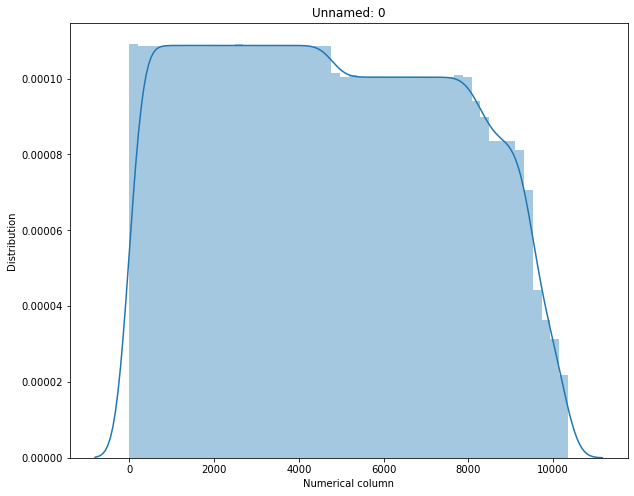

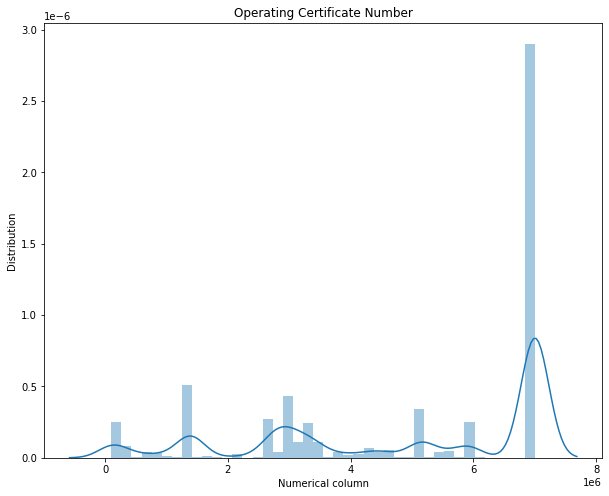

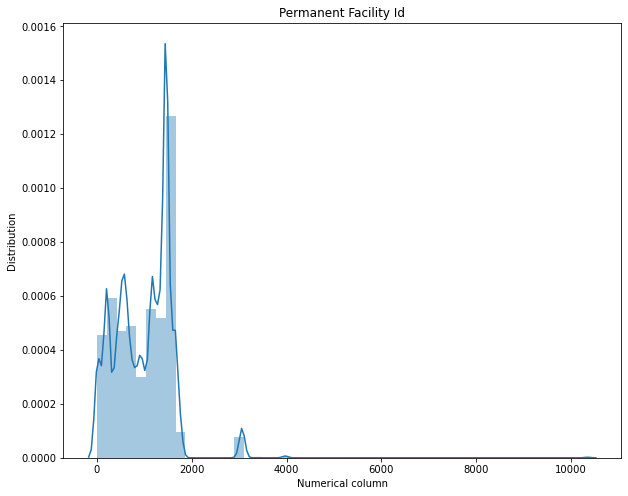

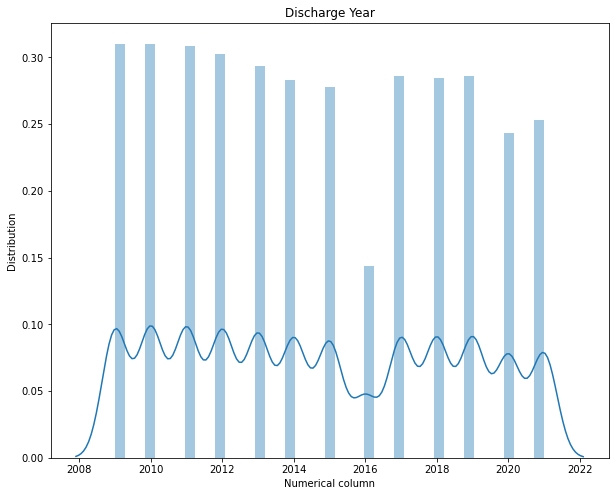

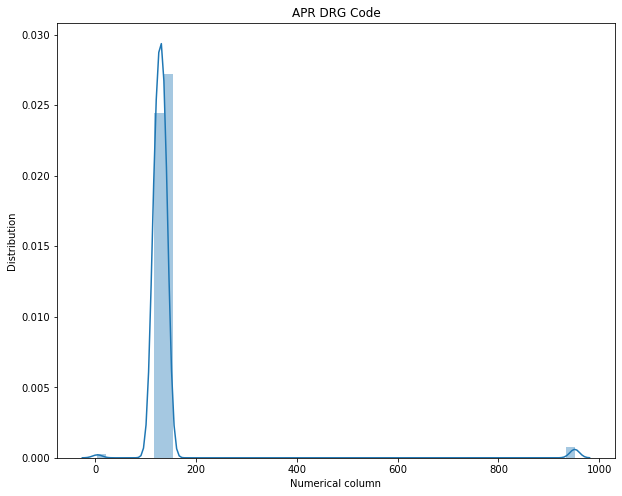

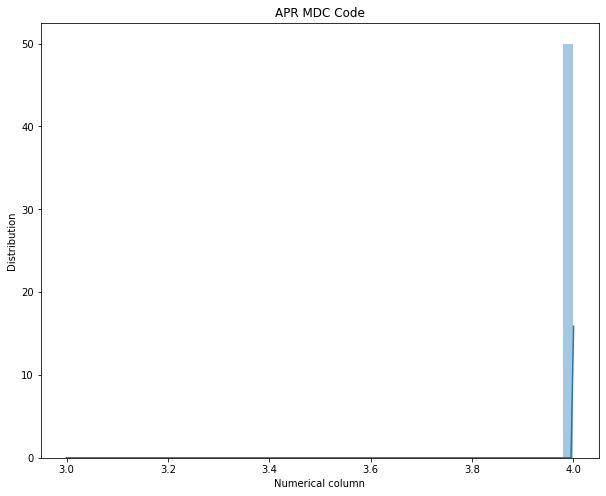

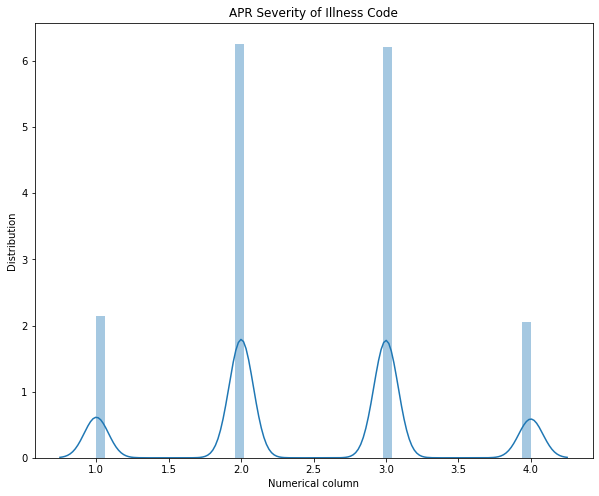

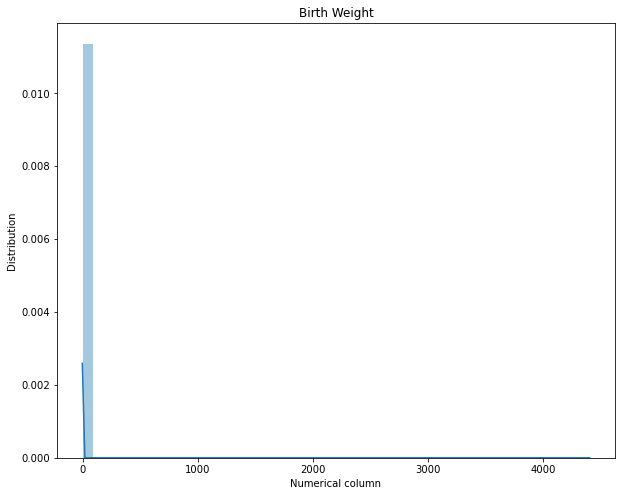

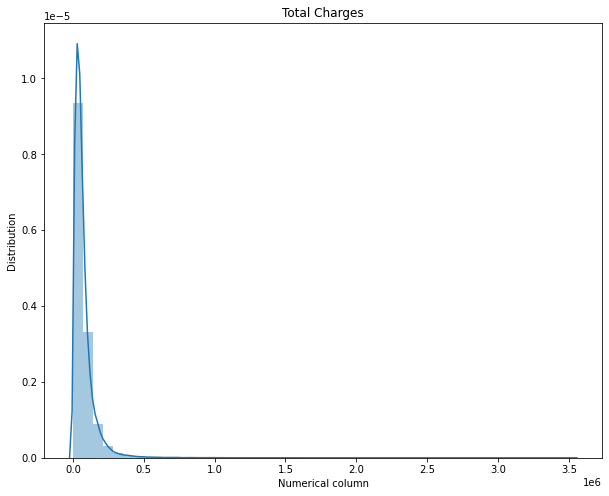

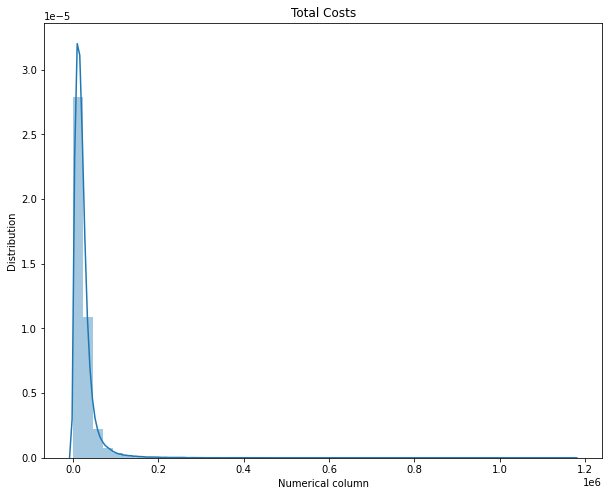

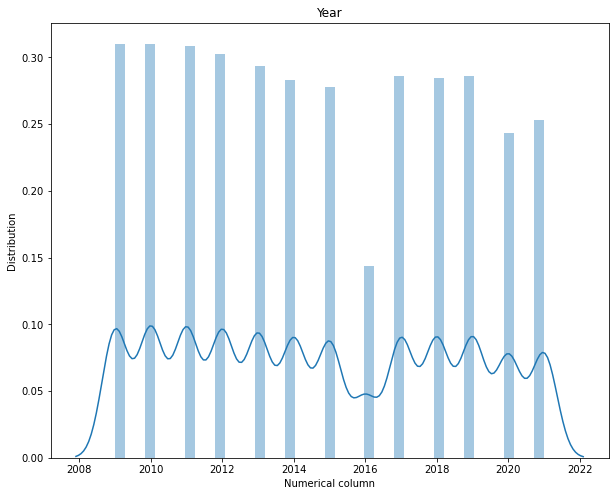

In [17]:
for i in num_col:
    plt.figure(figsize=(10,8))
    sns.distplot(x=num_col[i])
    plt.title(i)
    plt.xlabel("Numerical column")
    plt.ylabel("Distribution")
    plt.show()

Unnamed: 0
Skew: 0.1


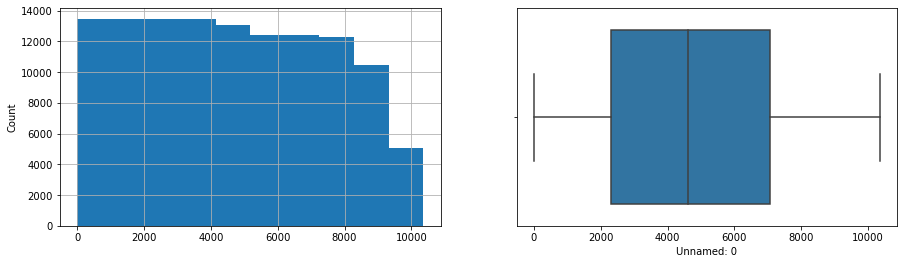

Operating Certificate Number
Skew: -0.63


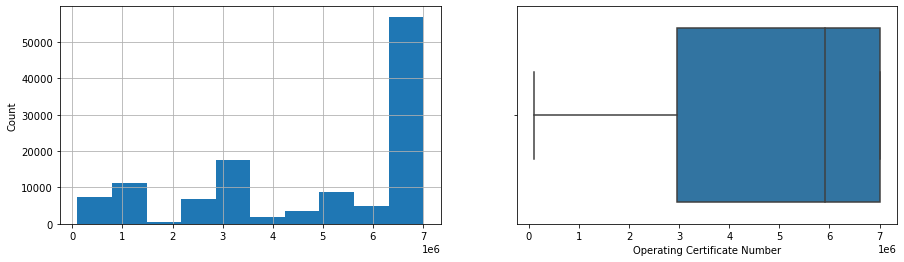

Permanent Facility Id
Skew: 1.58


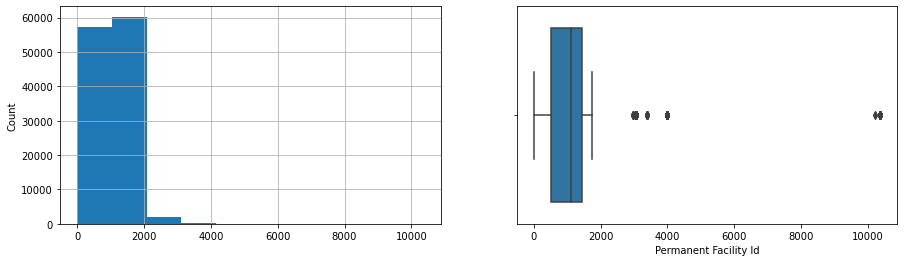

Discharge Year
Skew: 0.1


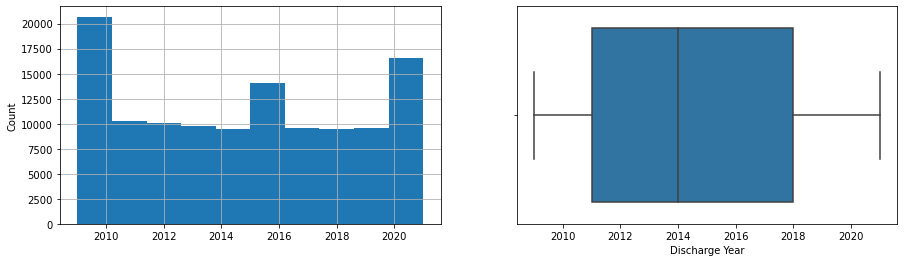

APR DRG Code
Skew: 7.92


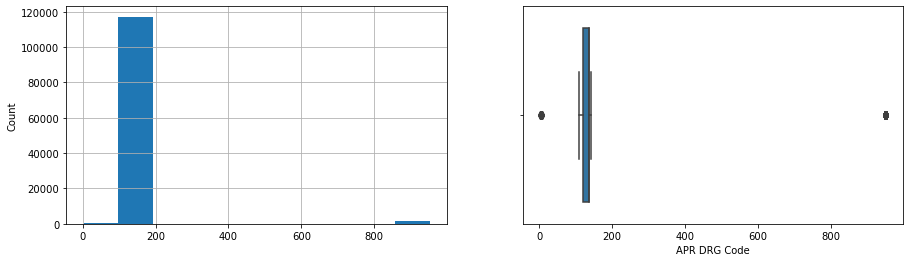

APR MDC Code
Skew: -345.77


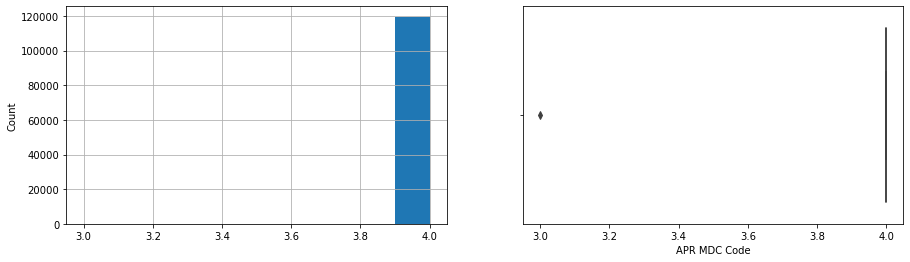

APR Severity of Illness Code
Skew: 0.0


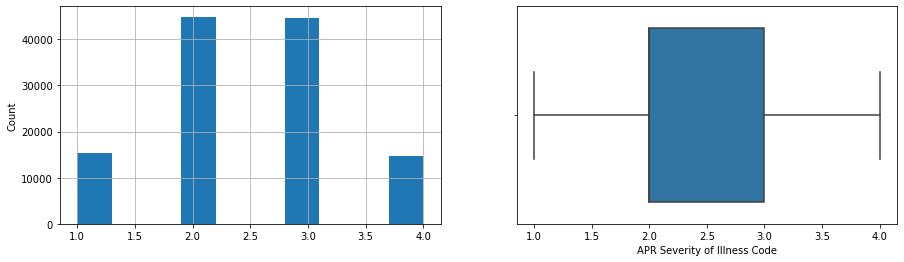

Birth Weight
Skew: 272.73


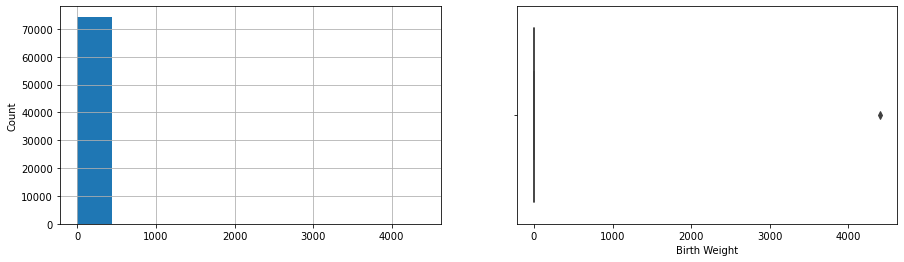

Total Charges
Skew: 7.14


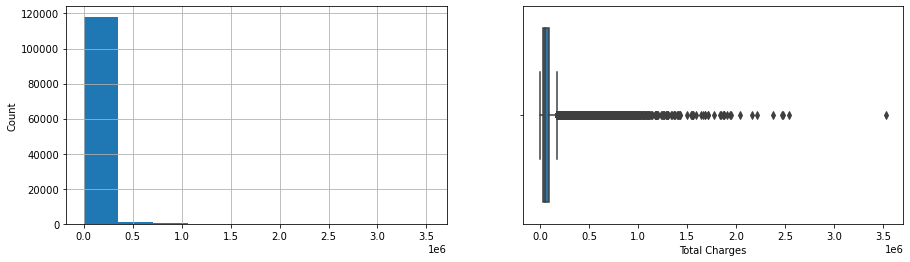

Total Costs
Skew: 7.93


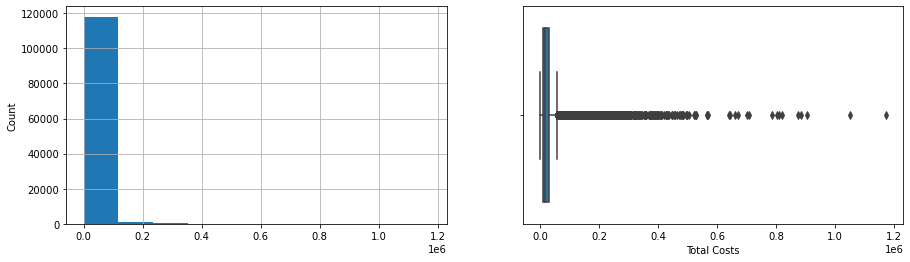

Year
Skew: 0.1


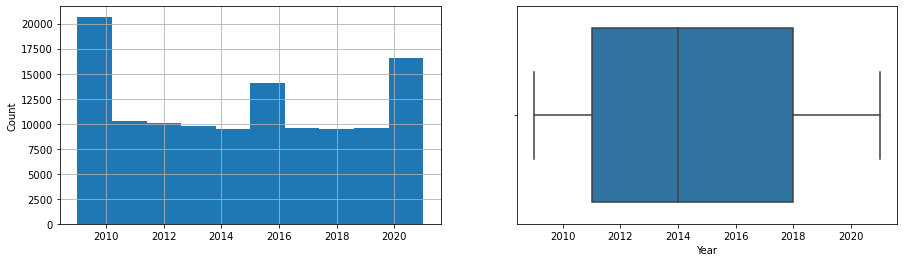

In [19]:
cont_cols = list(num_col)
for col in cont_cols:
    print(col)
    print('Skew:', round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=10,grid=True)
    
    
    plt.ylabel('Count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    
    plt.show()

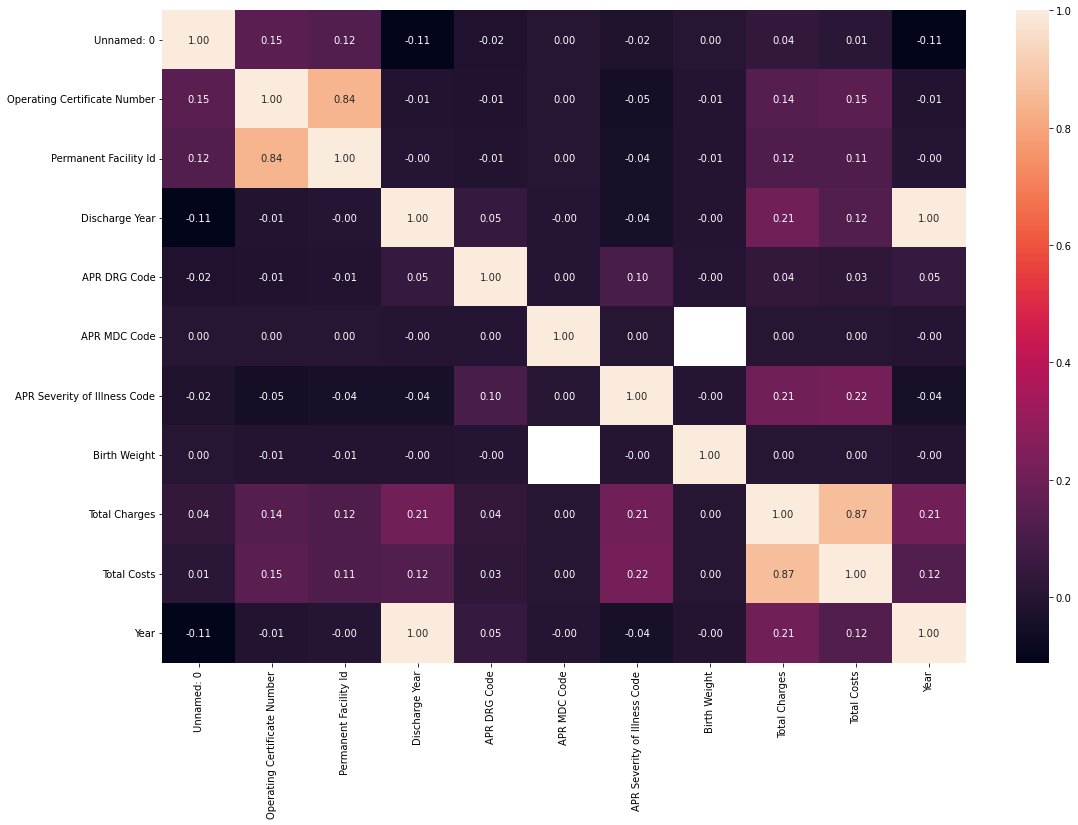

In [20]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, fmt='0.2f')

plt.show()

## numbers of cat in categorical varibales

In [31]:
unique_types

Hospital Service Area                    9
Hospital County                         57
Facility Name                          295
Age Group                                5
Zip Code - 3 digits                     50
Gender                                   2
Race                                     5
Ethnicity                                4
Length of Stay                         119
Type of Admission                        6
Patient Disposition                     19
CCSR Diagnosis Code                      3
CCSR Diagnosis Description               3
CCSR Procedure Code                    401
CCSR Procedure Description             331
APR DRG Description                     38
APR MDC Description                      3
APR Severity of Illness Description      4
APR Risk of Mortality                    4
APR Medical Surgical Description         2
Payment Typology 1                      16
Payment Typology 2                      16
Payment Typology 3                      16
Abortion Ed

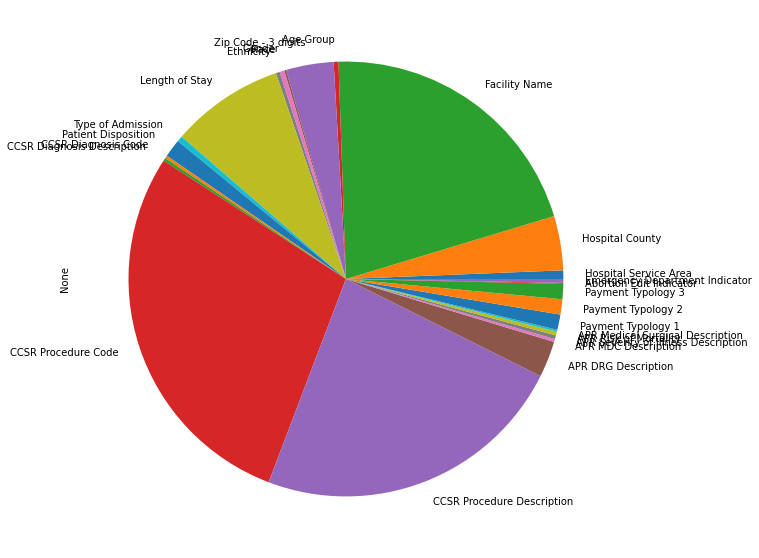

In [30]:
unique_types = df.select_dtypes(include='object').nunique()



unique_types.plot(kind='pie',figsize=(12,10))

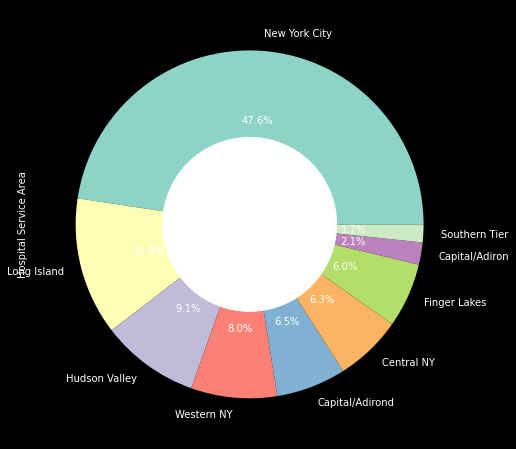

In [51]:
plt.figure(figsize=(10,8))
plt.style.use('dark_background')
df['Hospital Service Area'].value_counts().plot(kind='pie',autopct='%1.1f%%')
circle = plt.Circle((0,0), 0.5, color='white')
plot = plt.gcf()
plot.gca().add_artist(circle)

plt.show()

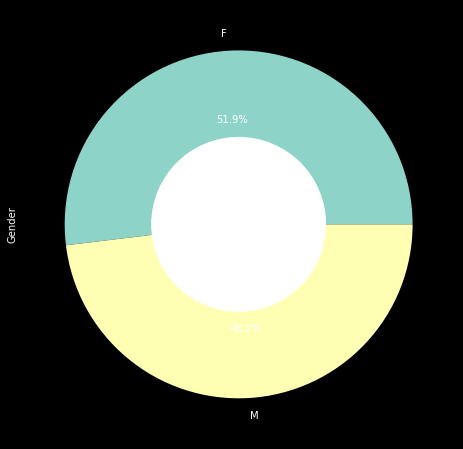

In [53]:
plt.figure(figsize=(10,8))

df['Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%')
circle = plt.Circle((0,0), 0.5, color='white')
plot = plt.gcf()
plot.gca().add_artist(circle)

plt.show()

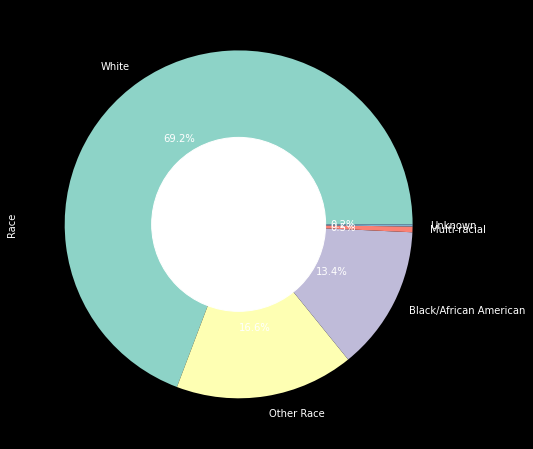

In [54]:

plt.figure(figsize=(10,8))

df['Race'].value_counts().plot(kind='pie',autopct='%1.1f%%')
circle = plt.Circle((0,0), 0.5, color='white')
plot = plt.gcf()
plot.gca().add_artist(circle)

plt.show()

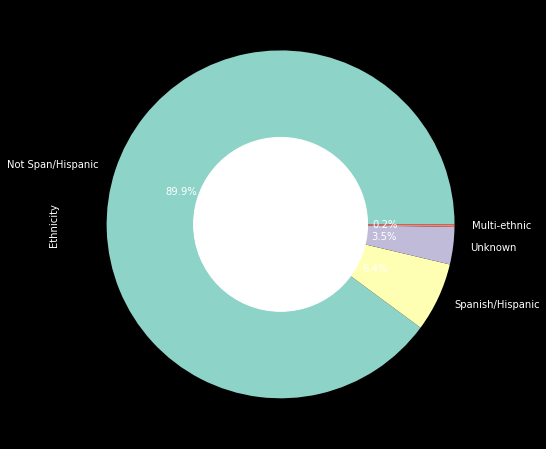

In [55]:
plt.figure(figsize=(10,8))

df['Ethnicity'].value_counts().plot(kind='pie',autopct='%1.1f%%')
circle = plt.Circle((0,0), 0.5, color='white')
plot = plt.gcf()
plot.gca().add_artist(circle)

plt.show()

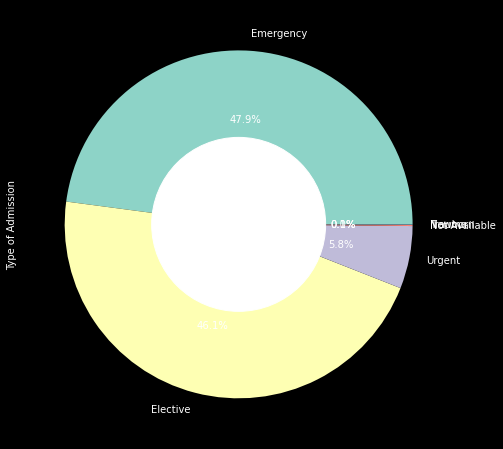

In [57]:
plt.figure(figsize=(10,8))

df['Type of Admission'].value_counts().plot(kind='pie',autopct='%1.1f%%')
circle = plt.Circle((0,0), 0.5, color='white')
plot = plt.gcf()
plot.gca().add_artist(circle)

plt.show()

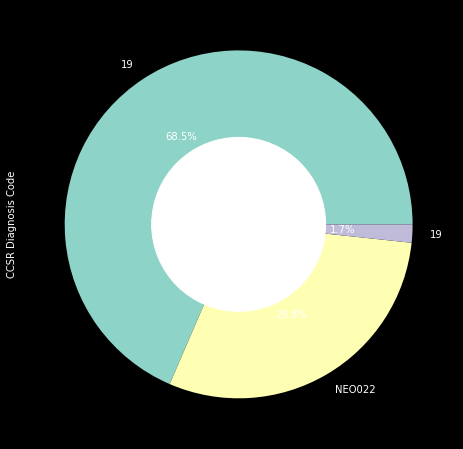

In [59]:
plt.figure(figsize=(10,8))

df['CCSR Diagnosis Code'].value_counts().plot(kind='pie',autopct='%1.1f%%')
circle = plt.Circle((0,0), 0.5, color='white')
plot = plt.gcf()
plot.gca().add_artist(circle)

plt.show()

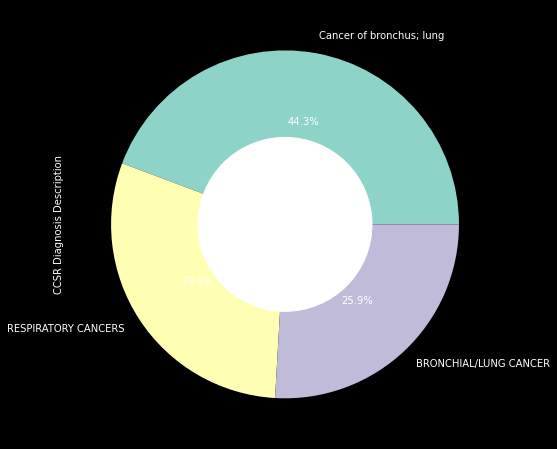

In [60]:


plt.figure(figsize=(10,8))

df['CCSR Diagnosis Description'].value_counts().plot(kind='pie',autopct='%1.1f%%')
circle = plt.Circle((0,0), 0.5, color='white')
plot = plt.gcf()
plot.gca().add_artist(circle)

plt.show()

In [62]:
cat_col = df.select_dtypes(include='object')

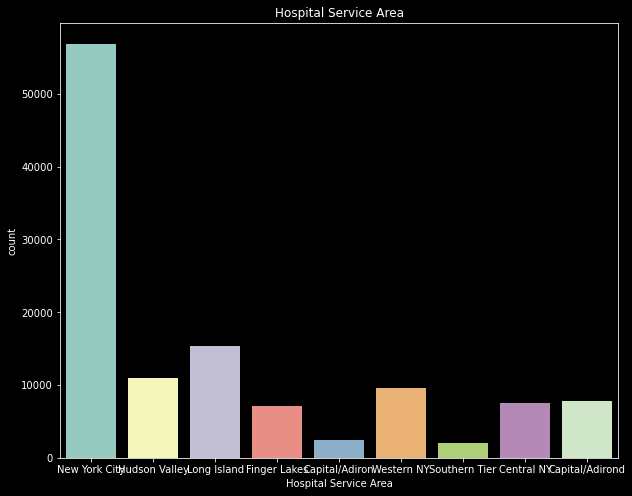

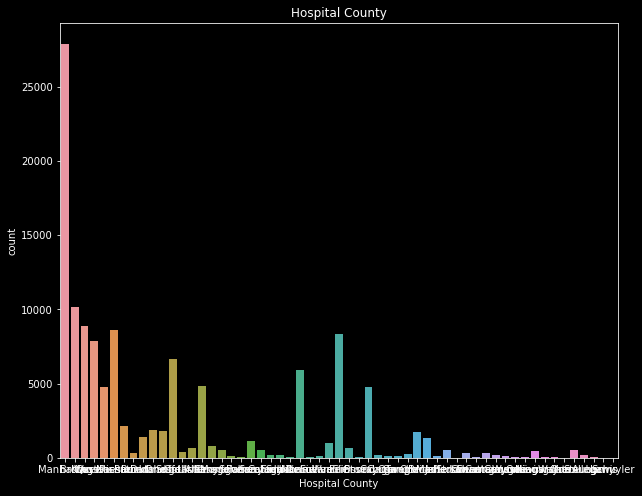

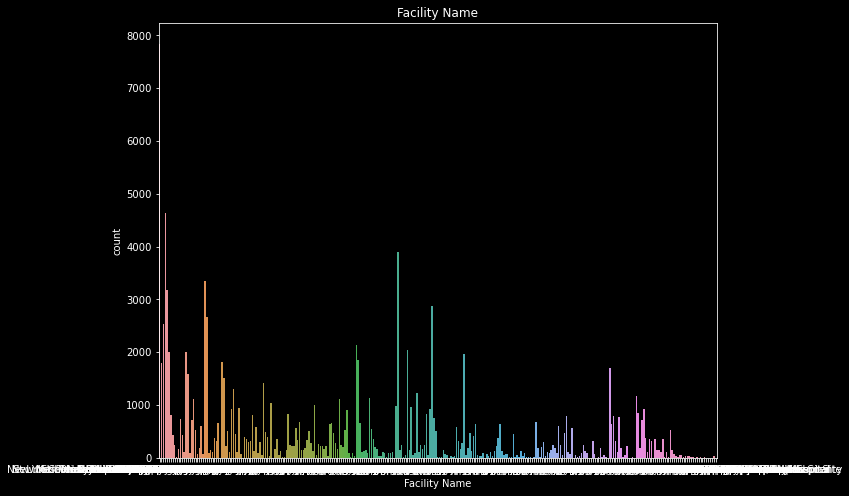

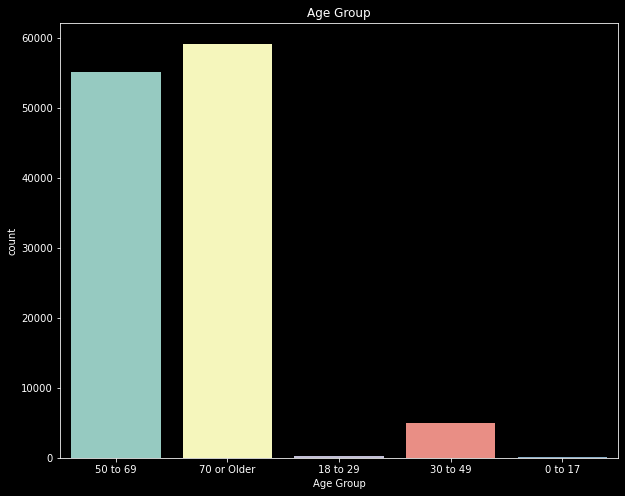

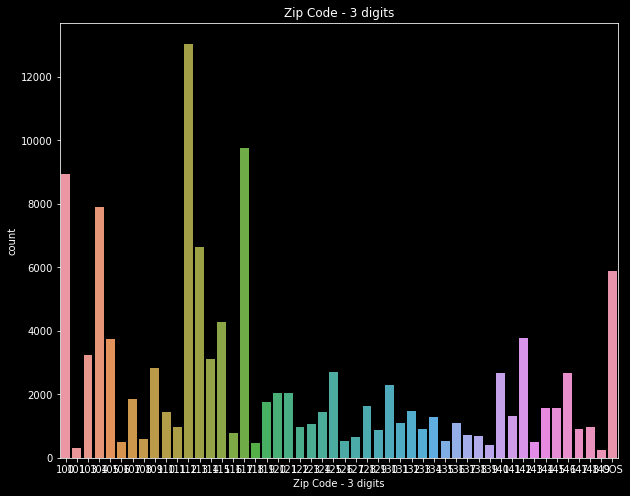

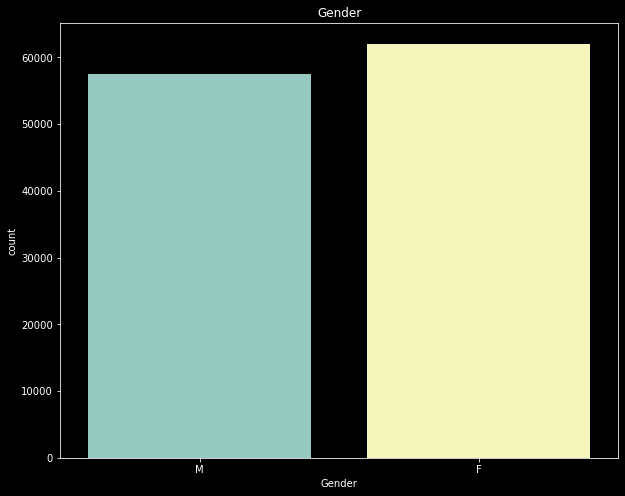

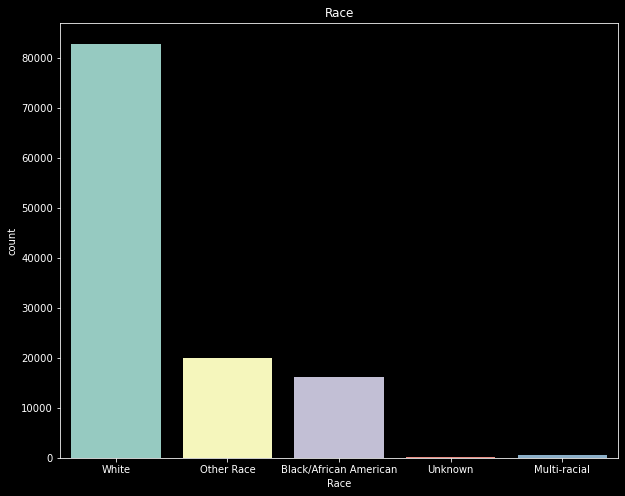

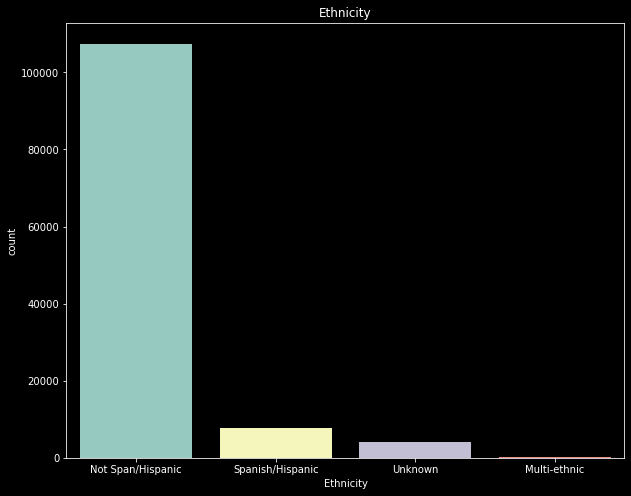

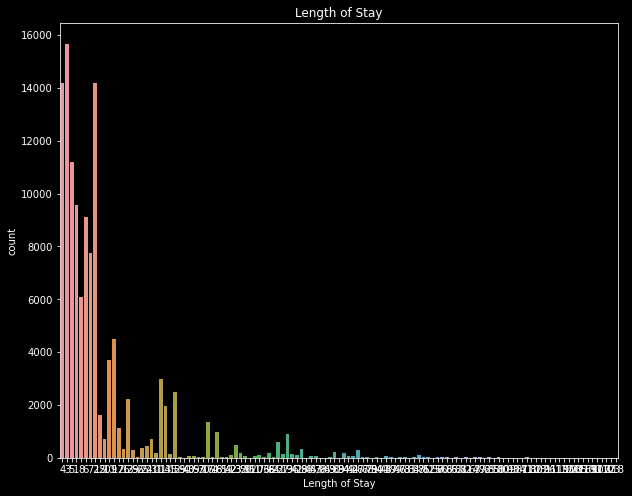

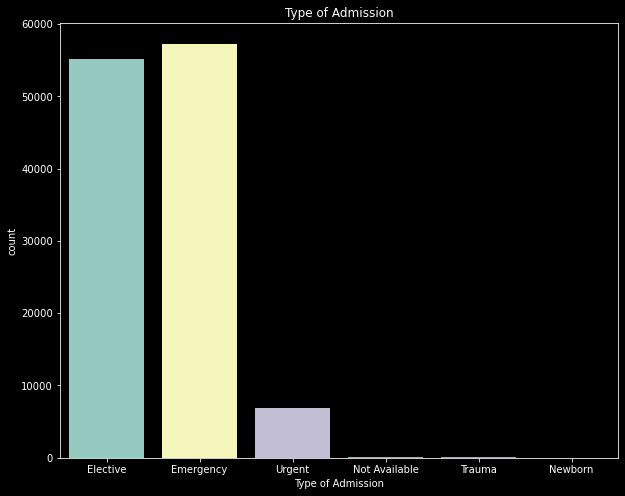

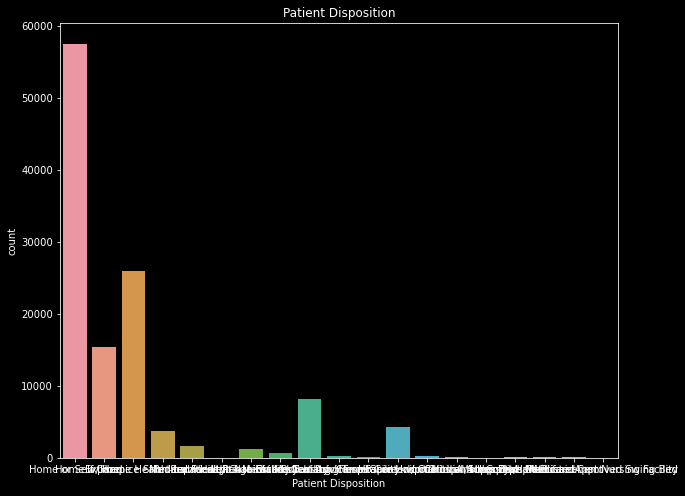

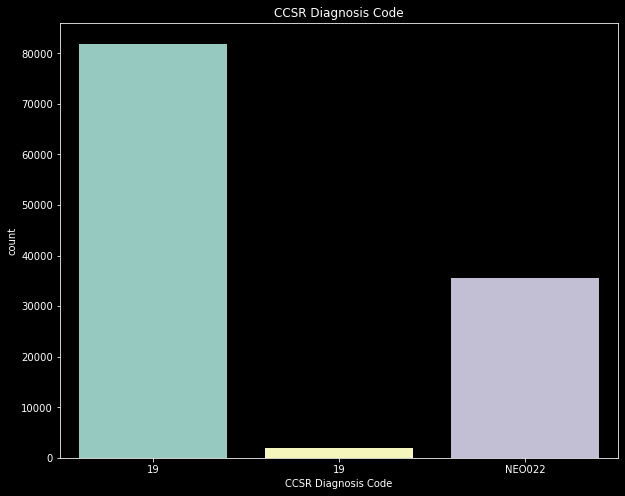

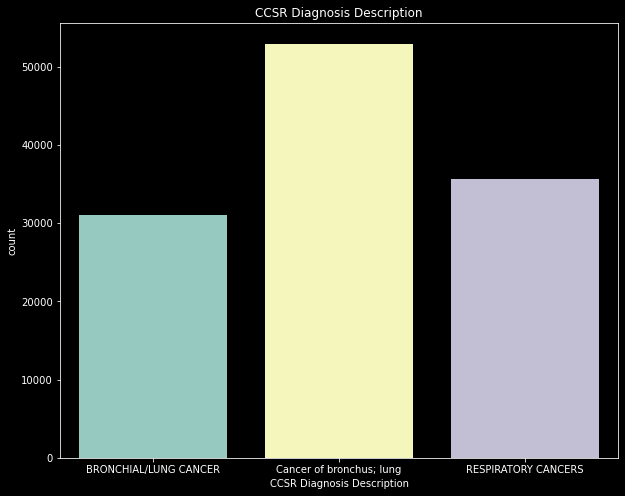

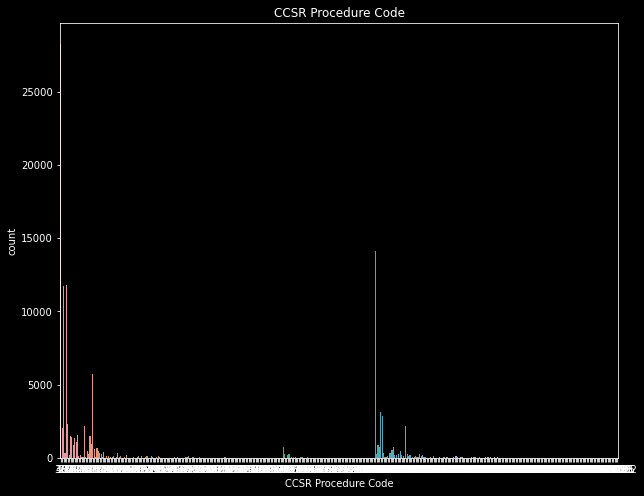

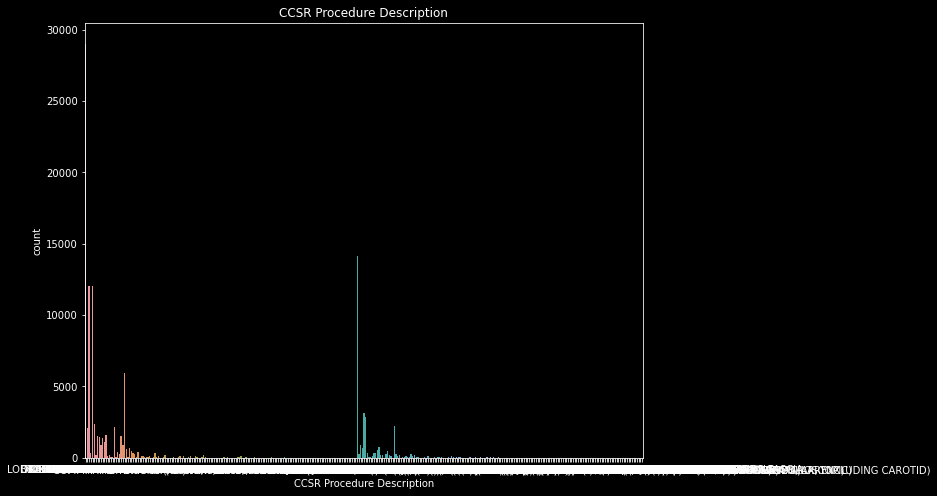

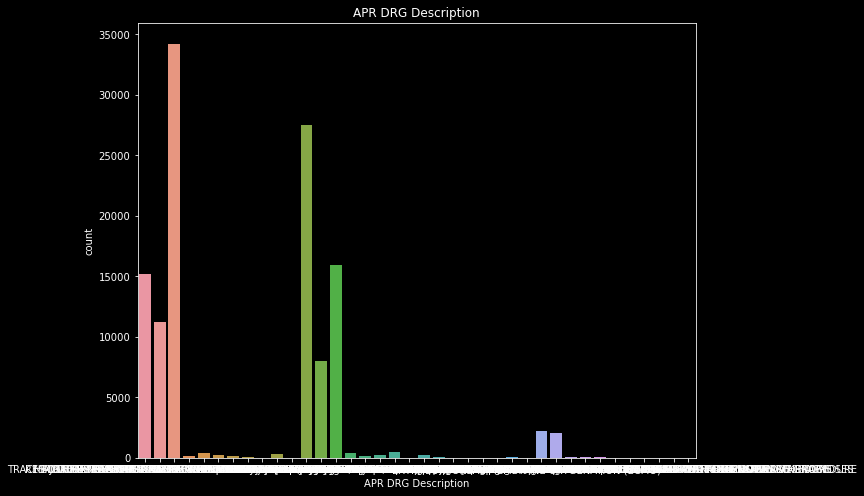

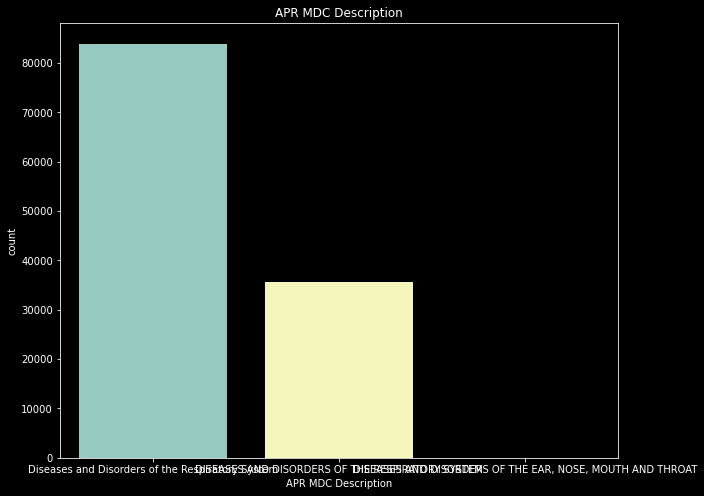

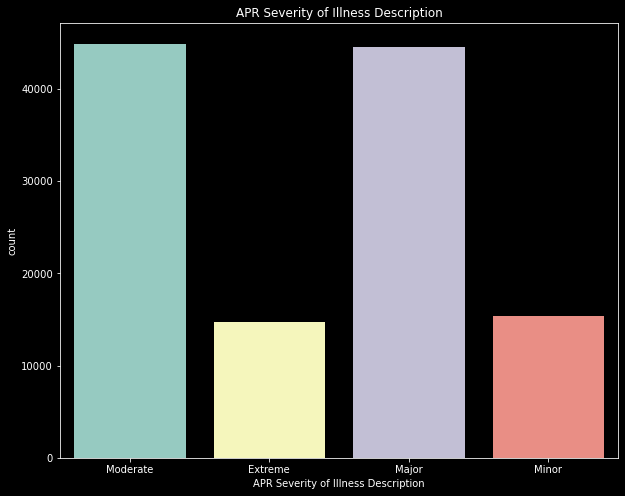

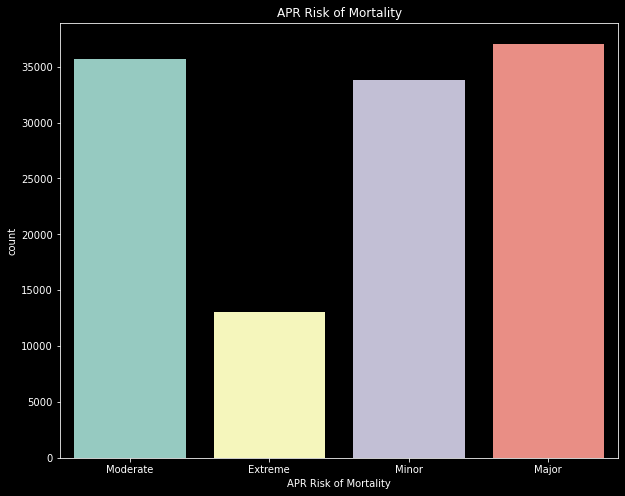

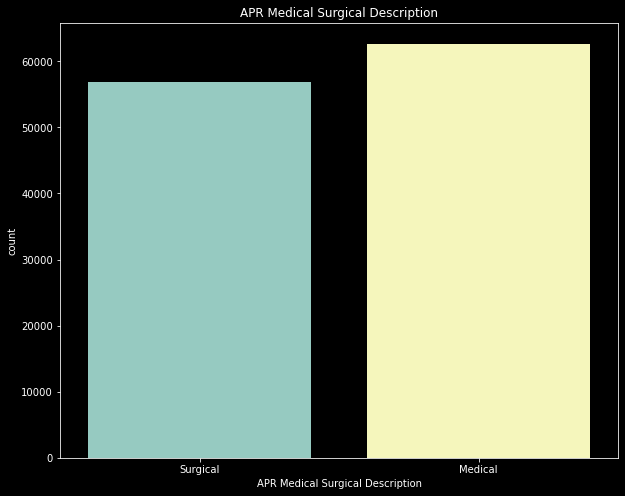

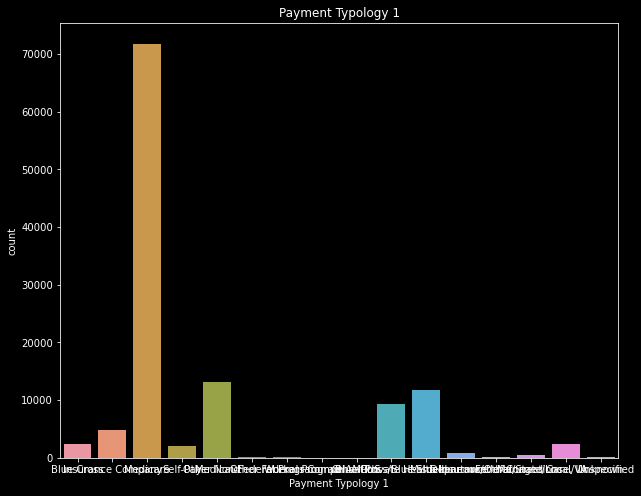

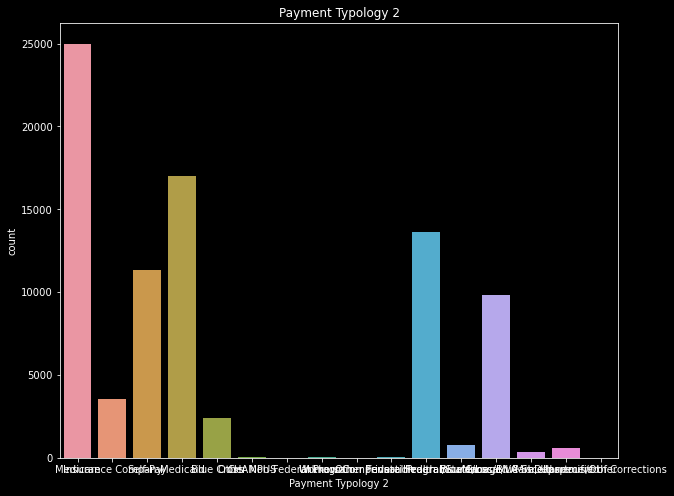

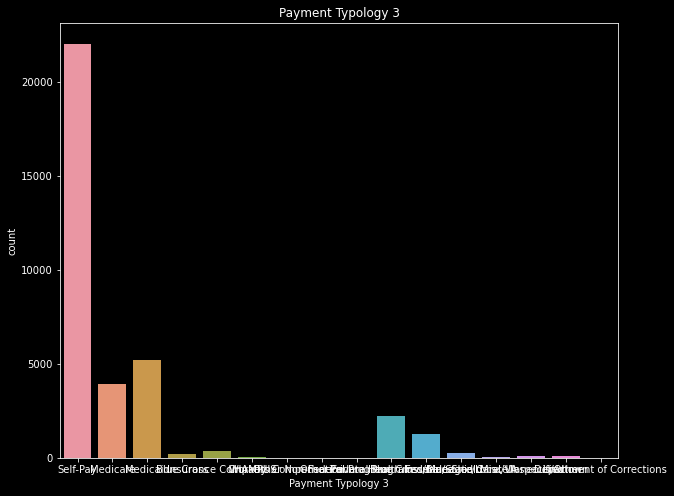

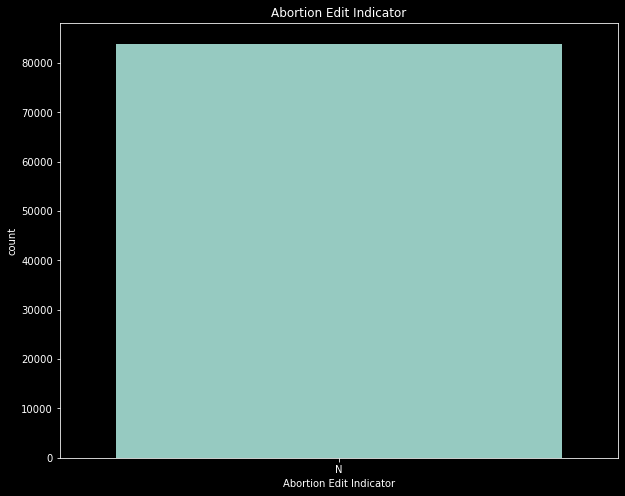

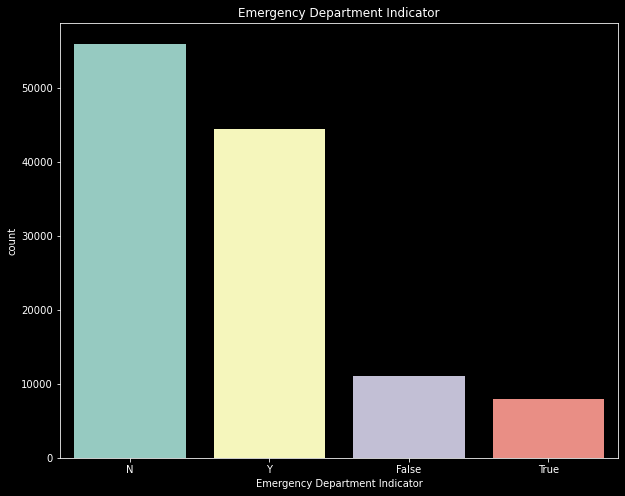

In [63]:
for i in cat_col:
    plt.figure(figsize=(10,8))
    
    sns.countplot(x=cat_col[i])
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()

## Categorical variable & Categorical variable

In [88]:
cat_col_new

,Hospital Service Area,Age Group,Gender,Race,Ethnicity,Type of Admission,CCSR Diagnosis Code,CCSR Diagnosis Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Abortion Edit Indicator,Emergency Department Indicator
0,New York City,50 to 69,M,White,Not Span/Hispanic,Elective,19,BRONCHIAL/LUNG CANCER,Diseases and Disorders of the Respiratory System,Moderate,Moderate,Surgical,N,N
1,New York City,50 to 69,M,White,Not Span/Hispanic,Elective,19,BRONCHIAL/LUNG CANCER,Diseases and Disorders of the Respiratory System,Extreme,Extreme,Surgical,N,N
2,New York City,50 to 69,F,White,Not Span/Hispanic,Elective,19,BRONCHIAL/LUNG CANCER,Diseases and Disorders of the Respiratory System,Moderate,Minor,Surgical,N,N
3,New York City,70 or Older,M,White,Not Span/Hispanic,Elective,19,BRONCHIAL/LUNG CANCER,Diseases and Disorders of the Respiratory System,Moderate,Moderate,Surgical,N,N
4,New York City,70 or Older,M,White,Not Span/Hispanic,Elective,19,BRONCHIAL/LUNG CANCER,Diseases and Disorders of the Respiratory System,Moderate,Major,Surgical,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119555,New York City,50 to 69,M,White,Not Span/Hispanic,Emergency,NEO022,RESPIRATORY CANCERS,DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM,Moderate,Moderate,Medical,NaN,Y
119556,New York City,50 to 69,M,White,Not Span/Hispanic,Emergency,NEO022,RESPIRATORY CANCERS,DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM,Moderate,Minor,Surgical,NaN,Y
119557,New York City,70 or Older,M,White,Not Span/Hispanic,Emergency,NEO022,RESPIRATORY CANCERS,DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM,Extreme,Extreme,Medical,NaN,Y
119558,New York City,50 to 69,F,Black/African American,Not Span/Hispanic,Emergency,NEO022,RESPIRATORY CANCERS,DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM,Major,Major,Medical,NaN,Y


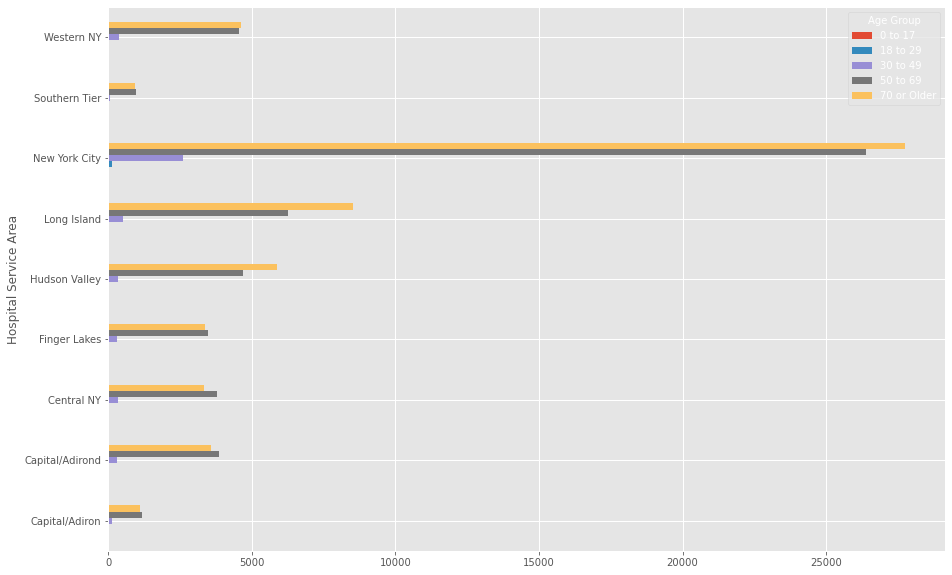

In [87]:
pd.crosstab(index=df['Hospital Service Area'], columns=df['Age Group'].sort_values(ascending=False)).plot(kind='barh',figsize=(15,10))

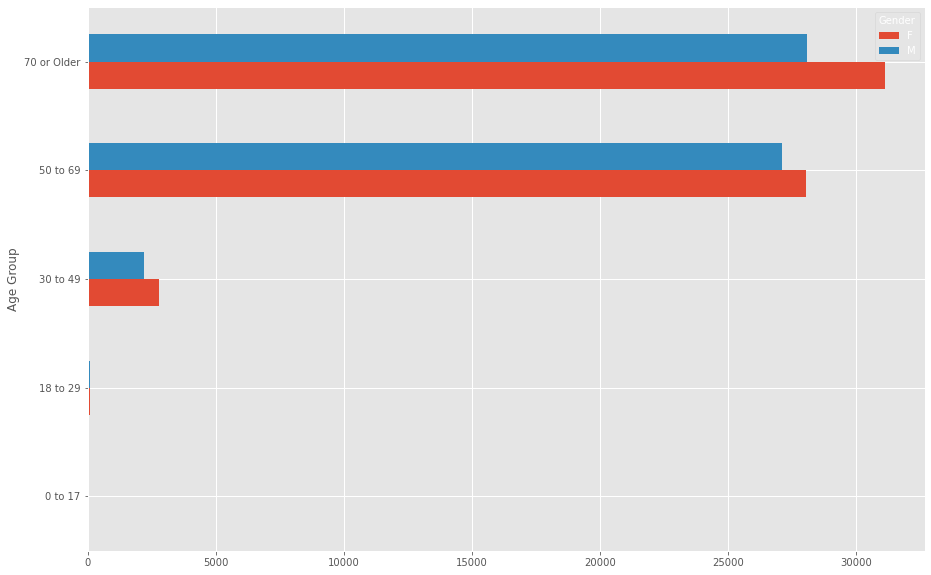

In [89]:
pd.crosstab(index=df['Age Group'], columns=df['Gender'].sort_values(ascending=False)).plot(kind='barh',figsize=(15,10))

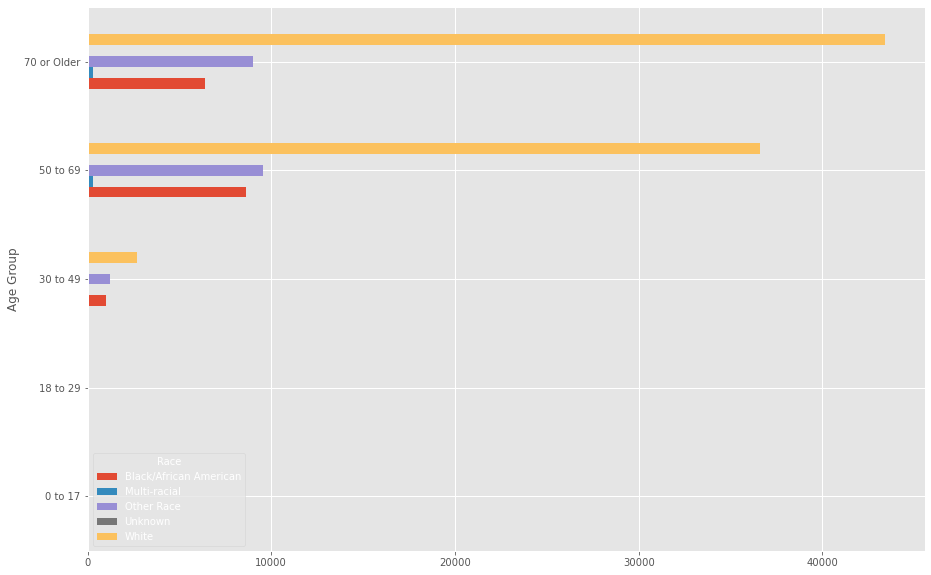

In [90]:
pd.crosstab(index=df['Age Group'], columns=df['Race'].sort_values(ascending=False)).plot(kind='barh',figsize=(15,10))

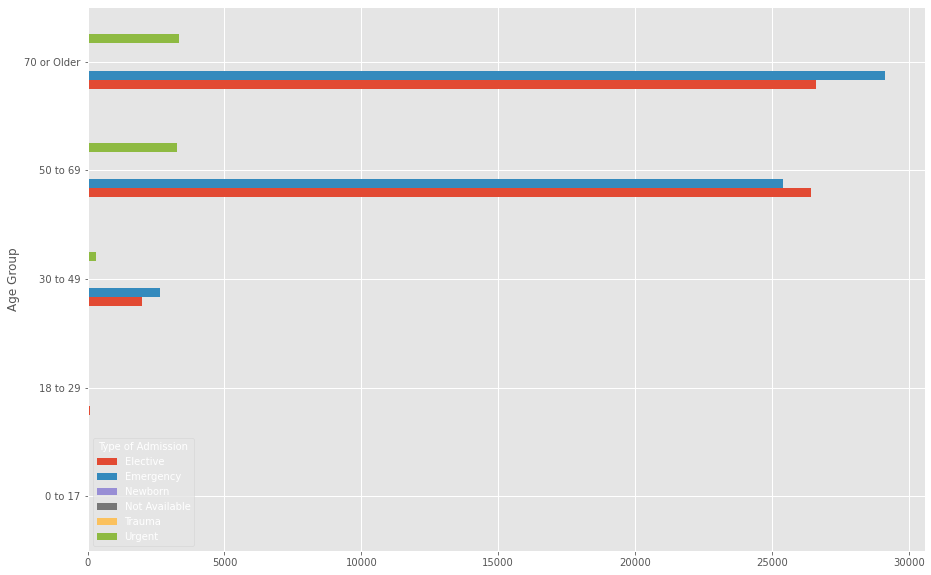

In [92]:

pd.crosstab(index=df['Age Group'], columns=df['Type of Admission'].sort_values(ascending=False)).plot(kind='barh',figsize=(15,10))

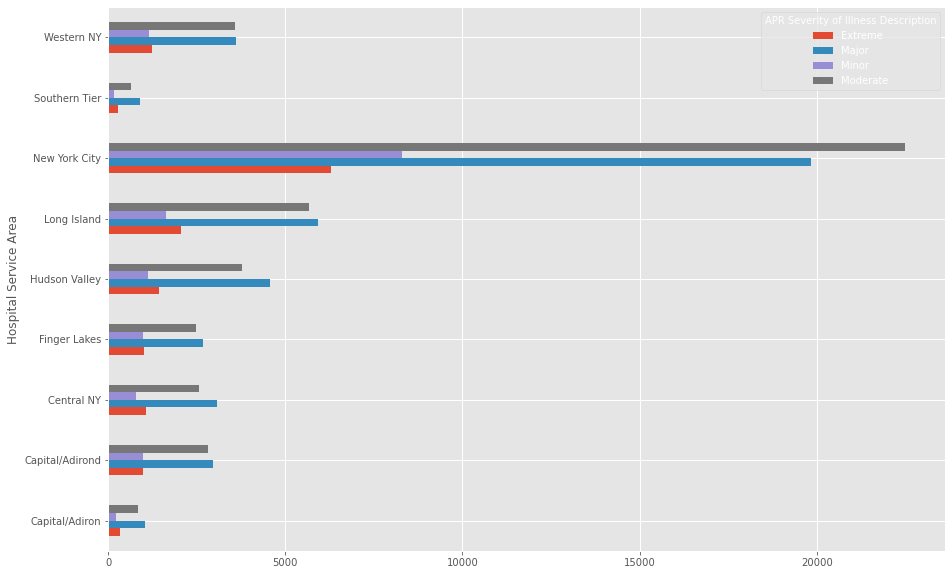

In [93]:

pd.crosstab(index=df['Hospital Service Area'], columns=df['APR Severity of Illness Description'].sort_values(ascending=False)).plot(kind='barh',figsize=(15,10))

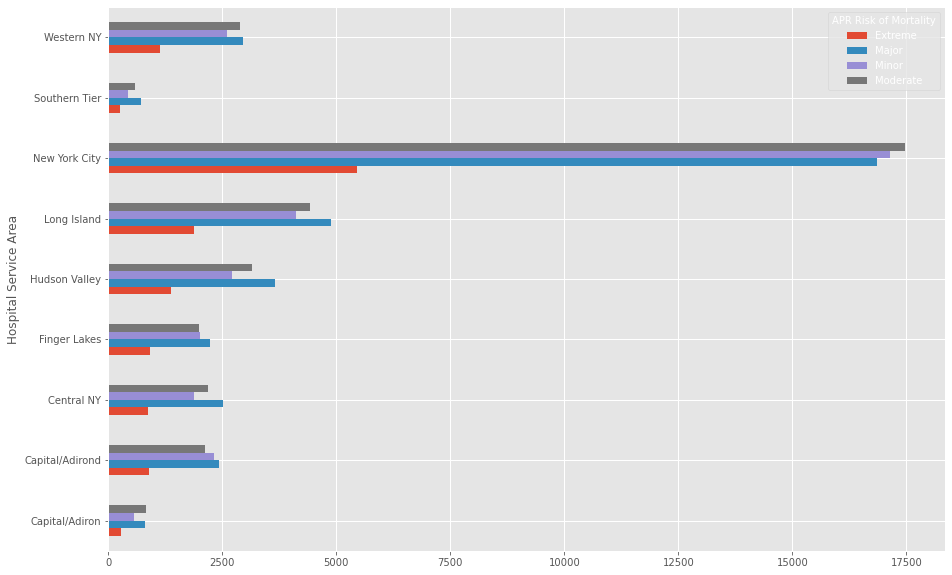

In [96]:
pd.crosstab(index=df['Hospital Service Area'], columns=df['APR Risk of Mortality'].sort_values(ascending=False)).plot(kind='barh',figsize=(15,10))

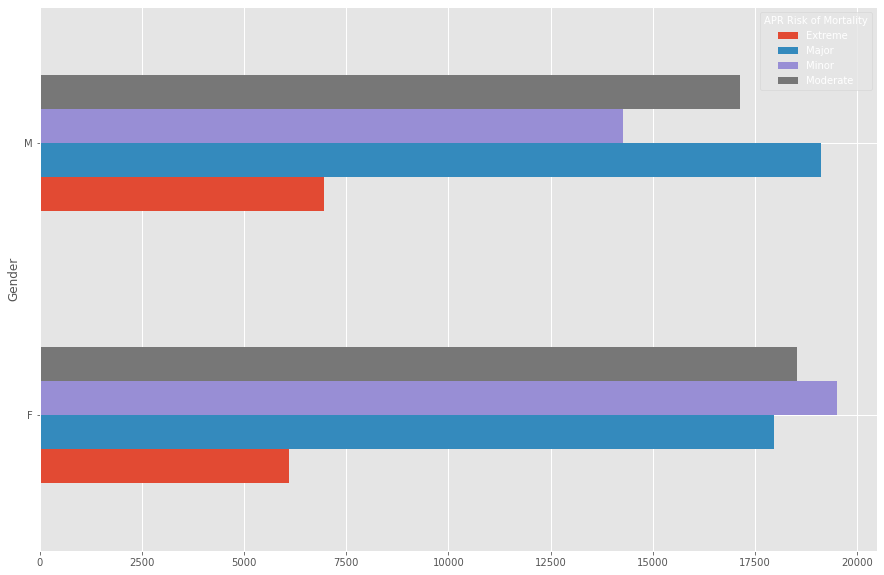

In [97]:
pd.crosstab(index=df['Gender'], columns=df['APR Risk of Mortality'].sort_values(ascending=False)).plot(kind='barh',figsize=(15,10))

## Categorical varibale & Numerical variable

In [67]:
unique_types = df.select_dtypes(include='object').nunique()
unique_types

Hospital Service Area                    9
Hospital County                         57
Facility Name                          295
Age Group                                5
Zip Code - 3 digits                     50
Gender                                   2
Race                                     5
Ethnicity                                4
Length of Stay                         119
Type of Admission                        6
Patient Disposition                     19
CCSR Diagnosis Code                      3
CCSR Diagnosis Description               3
CCSR Procedure Code                    401
CCSR Procedure Description             331
APR DRG Description                     38
APR MDC Description                      3
APR Severity of Illness Description      4
APR Risk of Mortality                    4
APR Medical Surgical Description         2
Payment Typology 1                      16
Payment Typology 2                      16
Payment Typology 3                      16
Abortion Ed

## create new categorical dataframe without too much unique types, is easier for visualization

In [84]:
cat_col_new = df[['Hospital Service Area','Age Group','Gender','Race','Ethnicity','Type of Admission','CCSR Diagnosis Code','CCSR Diagnosis Description','APR MDC Description','APR Severity of Illness Description','APR Risk of Mortality','APR Medical Surgical Description','Abortion Edit Indicator','Emergency Department Indicator']]


In [ ]:
## 


In [82]:

def box_plot(df, num_col, cat_col_new,var):
    
    df = pd.concat([num_col,cat_col_new],axis=1)
    for i in cat_col_new.columns:
        plt.style.use('ggplot')
        df.boxplot(column=var,by=i)
        plt.xlabel(i)
        plt.ylabel(var)
        plt.show()

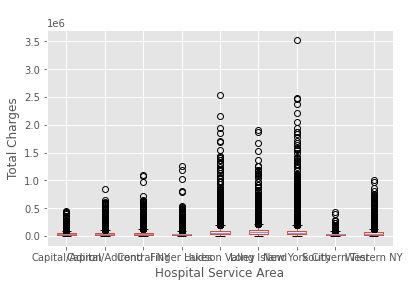

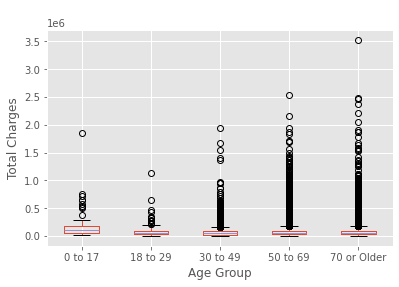

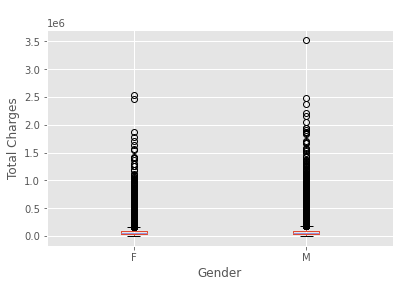

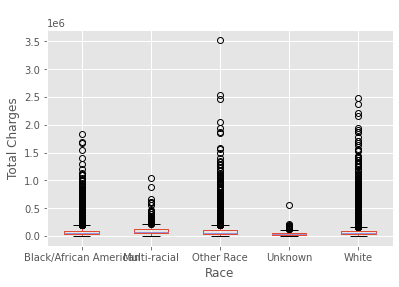

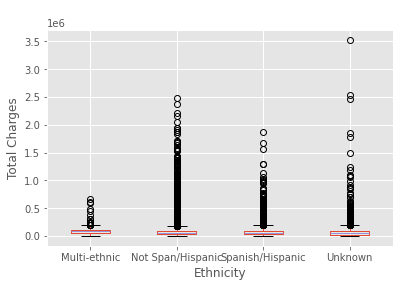

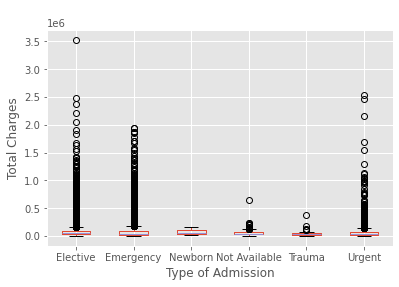

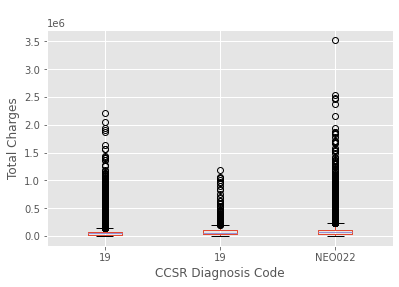

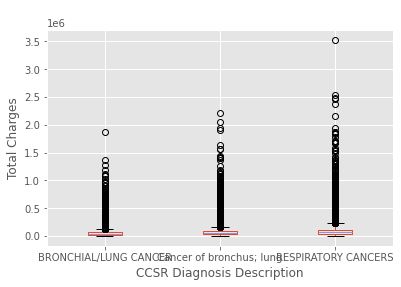

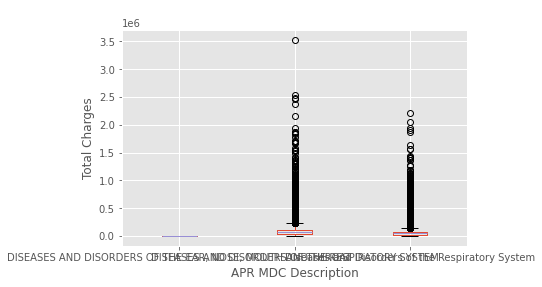

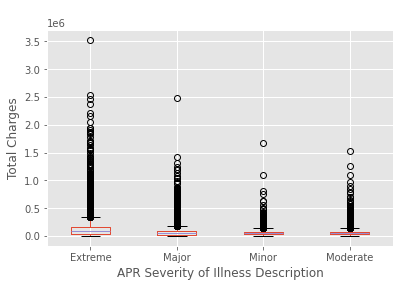

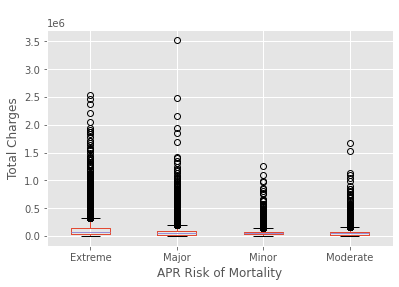

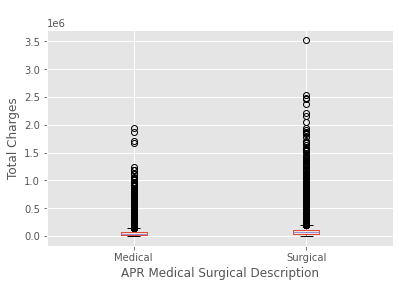

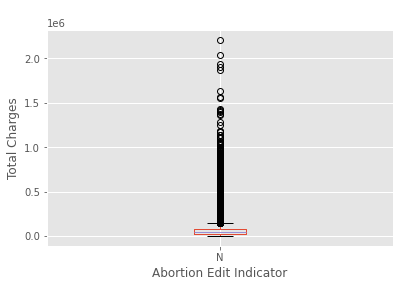

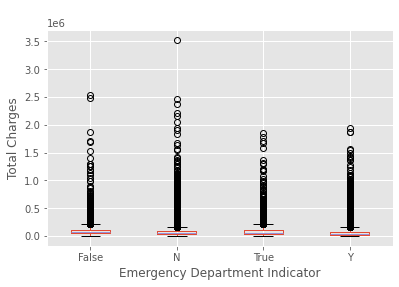

In [83]:
box_plot(df, num_col, cat_col_new,'Total Charges')

## Numerical variable & Numerical variable

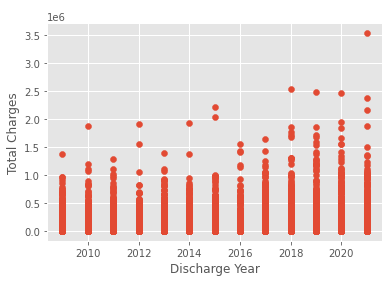

In [99]:
plt.scatter(num_col['Discharge Year'], num_col['Total Charges'])
plt.title('Total Charges VS Year')
plt.xlabel('Discharge Year')
plt.ylabel('Total Charges')
plt.show()

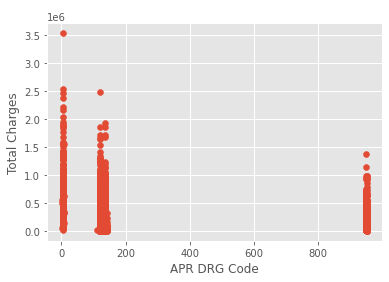

In [100]:
plt.scatter(num_col['APR DRG Code'], num_col['Total Charges'])
plt.title('APR DRG Code VS Year')
plt.xlabel('APR DRG Code')
plt.ylabel('Total Charges')
plt.show()

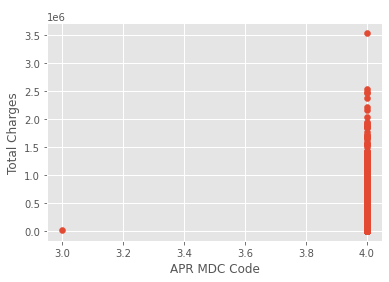

In [101]:

plt.scatter(num_col['APR MDC Code'], num_col['Total Charges'])
plt.title('APR MDC Code VS Year')
plt.xlabel('APR MDC Code')
plt.ylabel('Total Charges')
plt.show()

## Cleaning data-handle missing values

In [104]:
df.isnull().sum()

Unnamed: 0                                 0
Hospital Service Area                     25
Hospital County                           25
Operating Certificate Number              62
Permanent Facility Id                     24
Facility Name                              0
Age Group                                  0
Zip Code - 3 digits                      795
Gender                                     0
Race                                       0
Ethnicity                                  0
Length of Stay                             0
Type of Admission                          0
Patient Disposition                        0
Discharge Year                             0
CCSR Diagnosis Code                        0
CCSR Diagnosis Description                 0
CCSR Procedure Code                     4301
CCSR Procedure Description              4301
APR DRG Code                               0
APR DRG Description                        0
APR MDC Code                               0
APR MDC De

In [119]:
df.drop(columns=['CCSR Procedure Code','CCSR Procedure Description','Payment Typology 2','Payment Typology 3','Birth Weight','Abortion Edit Indicator'],inplace=True)

In [120]:
df

,Unnamed: 0,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,...,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Emergency Department Indicator,Total Charges,Total Costs,Year
0,0,New York City,Manhattan,7002020.0,1453.0,Memorial Hospital for Cancer and Allied Diseases,50 to 69,NaN,M,White,...,Diseases and Disorders of the Respiratory System,2,Moderate,Moderate,Surgical,Blue Cross,N,46310.15,20853.59,2009
1,1,New York City,Manhattan,7002020.0,1453.0,Memorial Hospital for Cancer and Allied Diseases,50 to 69,NaN,M,White,...,Diseases and Disorders of the Respiratory System,4,Extreme,Extreme,Surgical,Blue Cross,N,62687.90,24499.28,2009
2,2,New York City,Manhattan,7002053.0,1463.0,NYU Hospitals Center,50 to 69,NaN,F,White,...,Diseases and Disorders of the Respiratory System,2,Moderate,Minor,Surgical,Insurance Company,N,72472.90,22973.12,2009
3,3,New York City,Manhattan,7002020.0,1453.0,Memorial Hospital for Cancer and Allied Diseases,70 or Older,NaN,M,White,...,Diseases and Disorders of the Respiratory System,2,Moderate,Moderate,Surgical,Insurance Company,N,53048.51,23430.57,2009
4,4,New York City,Manhattan,7002053.0,1463.0,NYU Hospitals Center,70 or Older,NaN,M,White,...,Diseases and Disorders of the Respiratory System,2,Moderate,Major,Surgical,Insurance Company,N,45696.98,14662.53,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119555,8436,New York City,Manhattan,7002053.0,1463.0,NYU Langone Hospitals,50 to 69,100,M,White,...,DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM,2,Moderate,Moderate,Medical,Blue Cross/Blue Shield,Y,94586.39,25266.78,2021
119556,8437,New York City,Manhattan,7002053.0,1463.0,NYU Langone Hospitals,50 to 69,100,M,White,...,DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM,2,Moderate,Minor,Surgical,Blue Cross/Blue Shield,Y,120136.99,28118.31,2021
119557,8438,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,70 or Older,104,M,White,...,DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM,4,Extreme,Extreme,Medical,Medicare,Y,167890.18,28383.51,2021
119558,8439,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,50 to 69,104,F,Black/African American,...,DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM,3,Major,Major,Medical,Medicare,Y,269262.76,49252.90,2021


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119560 entries, 0 to 119559
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Unnamed: 0                           119560 non-null  int64  
 1   Hospital Service Area                119535 non-null  object 
 2   Hospital County                      119535 non-null  object 
 3   Operating Certificate Number         119498 non-null  float64
 4   Permanent Facility Id                119536 non-null  float64
 5   Facility Name                        119560 non-null  object 
 6   Age Group                            119560 non-null  object 
 7   Zip Code - 3 digits                  118765 non-null  object 
 8   Gender                               119560 non-null  object 
 9   Race                                 119560 non-null  object 
 10  Ethnicity                            119560 non-null  object 
 11  Length of Sta

In [123]:
df.isnull().sum()

Unnamed: 0                               0
Hospital Service Area                   25
Hospital County                         25
Operating Certificate Number            62
Permanent Facility Id                   24
Facility Name                            0
Age Group                                0
Zip Code - 3 digits                    795
Gender                                   0
Race                                     0
Ethnicity                                0
Length of Stay                           0
Type of Admission                        0
Patient Disposition                      0
Discharge Year                           0
CCSR Diagnosis Code                      0
CCSR Diagnosis Description               0
APR DRG Code                             0
APR DRG Description                      0
APR MDC Code                             0
APR MDC Description                      0
APR Severity of Illness Code             0
APR Severity of Illness Description      0
APR Risk of

In [128]:
df['Hospital Service Area']=df['Hospital Service Area'].fillna(df['Hospital Service Area'].mode()[0])

df['Hospital County']=df['Hospital County'].fillna(df['Hospital County'].mode()[0])
df['Zip Code - 3 digits']=df['Zip Code - 3 digits'].fillna(df['Zip Code - 3 digits'].mode()[0])

In [131]:
df.dropna(inplace=True)

In [132]:
df.isnull().sum()

Unnamed: 0                             0
Hospital Service Area                  0
Hospital County                        0
Operating Certificate Number           0
Permanent Facility Id                  0
Facility Name                          0
Age Group                              0
Zip Code - 3 digits                    0
Gender                                 0
Race                                   0
Ethnicity                              0
Length of Stay                         0
Type of Admission                      0
Patient Disposition                    0
Discharge Year                         0
CCSR Diagnosis Code                    0
CCSR Diagnosis Description             0
APR DRG Code                           0
APR DRG Description                    0
APR MDC Code                           0
APR MDC Description                    0
APR Severity of Illness Code           0
APR Severity of Illness Description    0
APR Risk of Mortality                  0
APR Medical Surg